# with this dataset we will try to find out the common factors between the hotels of trip advisor which have great reviews and which have bad reviews.

In [1]:
import pandas as pd
from pandas import DataFrame
#df = pd.read_csv (r'/Users/rokibhasan/OneDrive - Concordia University - Canada/trip_advisor_review_project/tripadvisor_hotel_reviews.csv')

df = pd.read_csv (r'tripadvisor_hotel_reviews.csv')
df.head()

#print (df)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


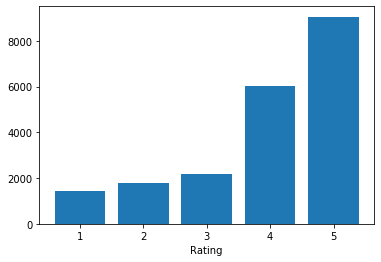

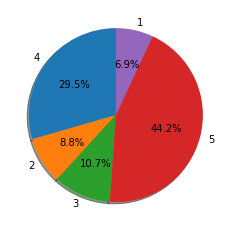

In [11]:
#lets visualize data first
ratings=list(df.Rating.unique())
#print(ratings)
rating_list=df.Rating.tolist()
#print(rating_list[:5])
count_list=[]
for i in range (len(ratings)):
                count=0
                for j in range (len(rating_list)):
                    if ratings[i]==rating_list[j]:
                        count=count+1
                count_list.append(count)
#print(count_list)

import matplotlib.pyplot as plt
plt.bar(ratings,count_list)
plt.xlabel("Rating")
plt.show()

#lets convert into percentage
summed_up=sum(count_list)
p_list=[]
for i in range (len(count_list)):
    p_list.append((count_list[i]/summed_up)*100) 
plt.pie(p_list,labels=ratings,autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

In [3]:
list_=df.values.tolist()
list_of_good_hotels=[]

for i in range(len(list_)):
    if (list_[i][1])==5:
        
        list_of_good_hotels.append(list_[i][0])

#print(len(list_of_good_hotels))
test_list=[]
for i in range (len(list_of_good_hotels)):
    test_list.append(list_of_good_hotels[i].split(','))
print((type(test_list[0])))
merged_list=[]
for i in range (len(test_list)):
    merged_list+=test_list[i]
    
print((merged_list[0:100]))

<class 'list'>
['unique', ' great stay', ' wonderful time hotel monaco', ' location excellent short stroll main downtown shopping area', ' pet friendly room showed no signs animal hair smells', ' monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy', ' goldfish named brandi enjoyed', " did n't partake free wine coffee/tea service lobby thought great feature", ' great staff friendly', ' free wireless internet hotel worked suite 2 laptops', ' decor lovely eclectic mix pattens color palatte', ' animal print bathrobes feel like rock stars', " nice did n't look like sterile chain hotel hotel personality excellent stay", '  ', 'great stay great stay', ' went seahawk game awesome', " downfall view building did n't complain", ' room huge staff helpful', ' booked hotels website seahawk package', ' no charge parking got voucher taxi', " problem taxi driver did n't want accept voucher barely spoke english", ' funny thing speak arabic called started making comments gi

------------NLP starts------------

In [4]:
import nltk
from nltk.probability import FreqDist
from nltk.collocations import *
frequency_of_words=FreqDist(merged_list)
most_common_list=frequency_of_words.most_common(150)

desired_list=[]
for i in range (len(most_common_list)):
    if (len(most_common_list[i][0])>15):
        desired_list.append(most_common_list[i][0])
print(desired_list)

[' definitely stay', ' staff friendly helpful', ' highly recommended', ' highly recommend hotel', ' highly recommend', ' not disappointed', ' definately stay', ' staff helpful friendly', ' recommend hotel', ' location excellent', ' location perfect', ' service excellent', ' definitely return', ' definitely recommend hotel', ' beds comfortable', ' bed comfortable', ' hotel fantastic', ' highly recommend resort', ' great experience', ' staff pleasant helpful', ' staff extremely friendly helpful', ' not hesitate stay', ' staff nice helpful', 'great place stay', ' staff wonderful', 'great hotel great location', ' excellent hotel', 'great experience', ' great place stay', ' rooms spacious clean', ' room clean comfortable', " ca n't wait return", ' beach beautiful', ' hotel staff friendly helpful', ' super.what better salvator worked 3 days rs.the rooms service attention just unbeliveable.the sports bar fast food heaven ate', ' went specialty rest. mexican good.we went 2 tours- bavarro runne

In [5]:
#converting dataframes to list to get only the reviews with 1 stars
#list_=df.values.tolist()
list_of_bad_hotels=[]

for i in range(len(list_)):
    if (list_[i][1])==1:
        
        list_of_bad_hotels.append(list_[i][0])

#print(len(list_of_good_hotels))
test_1_list=[]
#getting the sentences from the reviews
for i in range (len(list_of_bad_hotels)):
    test_1_list.append(list_of_bad_hotels[i].split(','))
#print((type(test_list[0])))
merged_1_list=[]
#created a big list combining all the list to apply NLP
for i in range (len(test_1_list)):
    merged_1_list+=test_1_list[i]
    
#print((merged_1_list[0:100]))



In [6]:
frequency_1_of_words=FreqDist(merged_1_list)
most_1_common_list=frequency_1_of_words.most_common(150)

desired_1_list=[]
for i in range (len(most_1_common_list)):
    if (len(most_1_common_list[i][0])>15):
        desired_1_list.append(most_1_common_list[i][0])
print(desired_1_list)

[' not recommend hotel', ' worst hotel stayed', ' beach beautiful', 'terrible service', ' hotel walkable distance form airport took shuttle half hour pick', ' stood freezing cold late night waited waited waited', ' hotel shuttles came went time shuttle took ridiculously long time arrive called twice', ' holiday inn double tree just close looked just fine', ' check don__Ç_é_ waste money dump', 'worst hotel experience', " n't waste time money", 'horrible experience', ' terrible experience', ' food really terrible', 'horrible experience not stay', ' beds old uncomfortable', 'worst experience hotel', ' awful experience', ' not ocean bavaro', ' place complete dump', ' guest slept floor', ' thing going location', ' air conditioning inadequate', ' stay away means']


# now the list is clear about the qulities a good or bad hotels have. 


In [10]:
good_hotel_attributes=[' staff helpful friendly',' location perfect', ' service excellent',  ' bed comfortable',  ' great experience',  ' rooms spacious clean', ' beach beautiful', 'rooms service people omg',  ' walking distance',  ' grounds beautiful']
#converting into dataframe
from pandas import DataFrame
list_df = DataFrame (good_hotel_attributes,columns=['Attributes'])
print(list_df)


                 Attributes
0    staff helpful friendly
1          location perfect
2         service excellent
3           bed comfortable
4          great experience
5      rooms spacious clean
6           beach beautiful
7  rooms service people omg
8          walking distance
9         grounds beautiful
